<a href="https://colab.research.google.com/github/rlfwo93/machine-learning/blob/master/Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **모듈 불러오기**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline 
tf.__version__

'2.3.0'

# **이미지 불러오기**

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
from IPython.display import Image

Mounted at /gdrive


# **데이터 정규화**

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 

print("x_train={0}".format(x_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("x_test={0}".format(x_test.shape))
print("y_test={0}".format(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
x_train=(60000, 28, 28)
y_train=(60000,)
x_test=(10000, 28, 28)
y_test=(10000,)


# **2층 NN**

In [ ]:
second = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation='softmax')
])

second.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
second.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
second.fit(x_train,y_train,epochs = 20, batch_size = 32 )

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2928 - accuracy: 0.9153
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1421 - accuracy: 0.9579
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1070 - accuracy: 0.9670
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0881 - accuracy: 0.9719
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0749 - accuracy: 0.9764
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0647 - accuracy: 0.9793
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9814
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9830
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0479 - accuracy: 0.9841
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.042

In [ ]:
second.evaluate(x_test,y_test,batch_size =32)

313/313 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.9808


[0.08207618445158005, 0.9807999730110168]

# **3층 NN**

In [ ]:
three = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation='softmax')
])

three.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
three.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

In [ ]:
three.fit(x_train,y_train,epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2389 - accuracy: 0.9281
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1055 - accuracy: 0.9688
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0796 - accuracy: 0.9750
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0630 - accuracy: 0.9803
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0541 - accuracy: 0.9829
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0459 - accuracy: 0.9854
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0395 - accuracy: 0.9869
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9884
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0328 - accuracy: 0.9896
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.030

In [ ]:
three.evaluate(x_test,y_test,batch_size= 32)

313/313 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9813


[0.09811870008707047, 0.9812999963760376]

# **4층 NN**

In [ ]:
four = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),  
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation='softmax')
])

four.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
four.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [ ]:
four.fit(x_train,y_train,epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2333 - accuracy: 0.9292
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1085 - accuracy: 0.9677
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0819 - accuracy: 0.9760
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0643 - accuracy: 0.9805
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0565 - accuracy: 0.9822
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0503 - accuracy: 0.9845
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0417 - accuracy: 0.9876
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0423 - accuracy: 0.9873
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0357 - accuracy: 0.9892
Epoch 10/20
1875/1875 [==============================] - 12s 7ms/step - l

In [ ]:
four.evaluate(x_test,y_test,batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.1036 - accuracy: 0.9831


[0.10356054455041885, 0.9830999970436096]

## **5층 NN**

In [ ]:
five = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'),  
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation='softmax')
])

five.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
five.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              

In [ ]:
five.fit(x_train,y_train,epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2390 - accuracy: 0.9295
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1171 - accuracy: 0.9666
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0893 - accuracy: 0.9748
Epoch 4/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0757 - accuracy: 0.9792
Epoch 5/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0615 - accuracy: 0.9825
Epoch 6/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0575 - accuracy: 0.9841
Epoch 7/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0494 - accuracy: 0.9860
Epoch 8/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0445 - accuracy: 0.9875
Epoch 9/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0423 - accuracy: 0.9882
Epoch 10/20
1875/1875 [==============================] - 32s 17m

In [ ]:
five.evaluate(x_test,y_test,batch_size = 32)

313/313 [==============================] - 1s 5ms/step - loss: 0.1437 - accuracy: 0.9824


[0.14369173347949982, 0.9824000000953674]

# **Hidden layer에 따른 정확도**

# **2층**

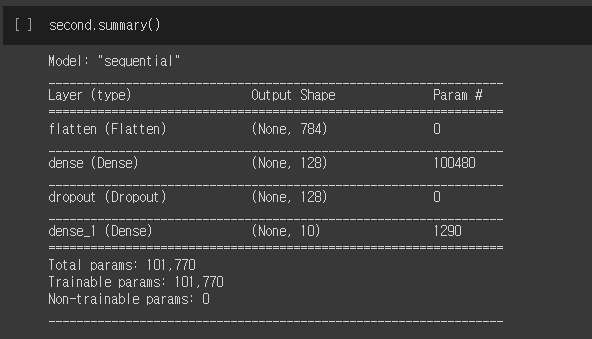

In [2]:
Image('/gdrive/My Drive/서머리/2층.PNG')

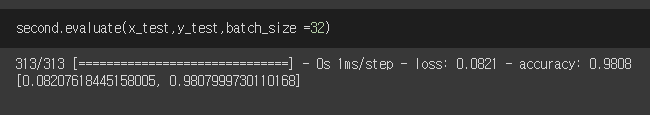

In [ ]:
Image('/gdrive/My Drive/mnist/2층.PNG')

# **3층**

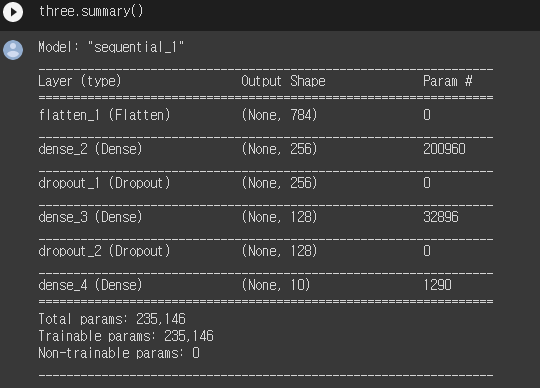

In [3]:
Image('/gdrive/My Drive/서머리/3층.PNG')

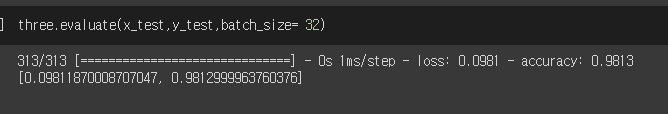

In [ ]:
Image('/gdrive/My Drive/mnist/3층.PNG')

# **4층**

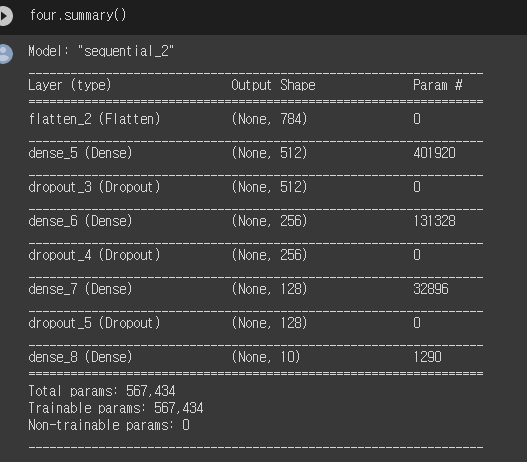

In [4]:
Image('/gdrive/My Drive/서머리/4층.PNG')

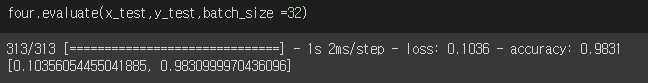

In [ ]:
Image('/gdrive/My Drive/mnist/4층.PNG')

# **5층**

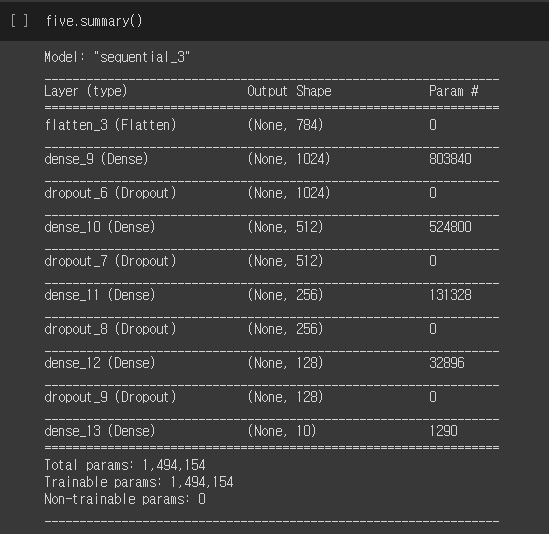

In [5]:
Image('/gdrive/My Drive/서머리/5층.PNG')

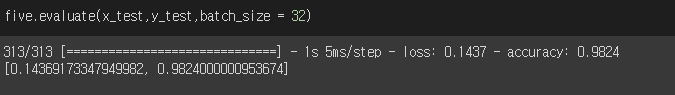

In [ ]:
Image('/gdrive/My Drive/mnist/5층.PNG')